In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix


In [2]:
Japan = pd.read_csv('Cleaned Data/Japan.csv')
China = pd.read_csv('Cleaned Data/China.csv')
Korea = pd.read_csv('Cleaned Data/Korea.csv')
Singapore = pd.read_csv('Cleaned Data/Singapore.CSV')
Malaysia = pd.read_csv('Cleaned Data/Malaysia.CSV')
Highincome  = pd.read_csv('Cleaned Data/Highincome_DF.CSV')
UpperMidincome = pd.read_csv('Cleaned Data/UpperMidincome_DF.CSV')
#Japan.set_index('Year', inplace = True)
China.set_index('Year', inplace = True) 
Korea.set_index('Year', inplace = True)
Singapore.set_index('Year', inplace = True)
Malaysia.set_index('Year', inplace = True) 
Highincome.set_index('Year', inplace = True)
UpperMidincome.set_index('Year', inplace = True) 
Japan.dropna(inplace = True)
China.dropna(inplace = True)
Korea.dropna(inplace = True)
Singapore.dropna(inplace = True)
Singapore.dropna(inplace = True)
Malaysia.dropna(inplace = True)

In [3]:
features =['14 Under', '15 to 64', '64 Above', 'Female(%)', 'Total pop']

def Test_Train(x):
    y = x['Work Population(%)'].pct_change()
    X = x[features].pct_change()
    y.dropna(inplace= True)
    X.dropna(inplace=True)
    y_train =  y[:42]
    y_test = y[42:]
    X_train =  X[:42]
    X_test =  X[42:]
    return (X_train, X_test, y_train, y_test)

In [4]:
from sklearn.preprocessing import MinMaxScaler
def OLS_Reg(x):
    X_train, X_test, y_train, y_test = Test_Train(x)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    result = sm.OLS(y_train, X_train).fit()
    return(result.summary())
print('Japan Summary:', OLS_Reg(Japan))
print('China Summary:', OLS_Reg(China))

Japan Summary:                                  OLS Regression Results                                
Dep. Variable:     Work Population(%)   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              3150.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):                    1.45e-47
Time:                        19:40:27   Log-Likelihood:                          245.27
No. Observations:                  42   AIC:                                     -480.5
Df Residuals:                      37   BIC:                                     -471.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Based on this, x1, which is the fertility rate, seems to have bigger signficance for China. Moreover, having more number of younger population seem to have positive coefficent than aging population.

In [20]:
from sklearn.neighbors import KNeighborsRegressor
empty = []
def KNNR(i, x):
        X_train, X_test, y_train, y_test = Test_Train(x)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(i)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(r2_score(prediction, y_test))
for i in range(1,30):
    empty.append(KNNR(i, China))
empty

[-0.8238788051580033,
 -1.3653389232150865,
 -2.2537140932019293,
 -3.067339328110328,
 -4.518966466606065,
 -5.07178068310518,
 -5.774394688226905,
 -6.821117825435322,
 -7.491930719963175,
 -7.1590145154567395,
 -7.758674122096119,
 -8.326926930947867,
 -9.321893436841382,
 -10.903379079376,
 -12.211868923016977,
 -12.516550423167587,
 -14.512213635479778,
 -16.850901349940635,
 -19.45969236413317,
 -19.249793248234386,
 -21.335195420465343,
 -25.610122063712414,
 -25.668303530893176,
 -27.85217634461568,
 -32.48146695665228,
 -34.905892901030505,
 -39.12195912613024,
 -39.986948517783446,
 -49.84104214869348]

-8.414120949023857
-1.3653389232150865
-8.675236632345843


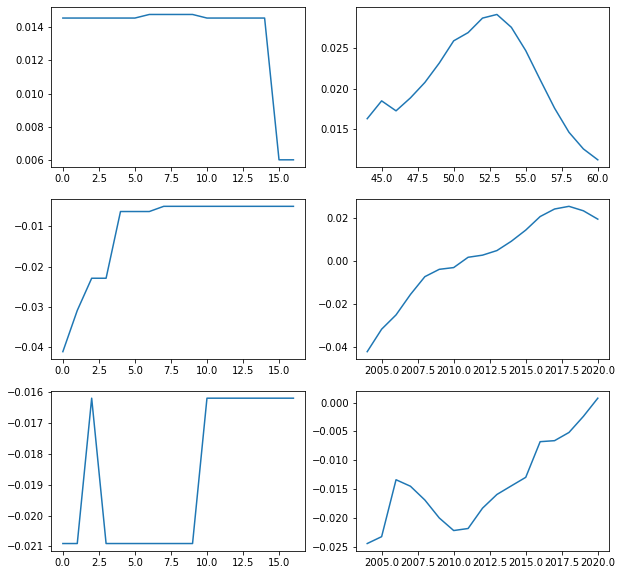

In [19]:
from sklearn.neighbors import KNeighborsRegressor
def KNNR(x):
        X_train, X_test, y_train, y_test = Test_Train(x)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(2)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(KNNR(Japan)[0])
ax[0,1].plot(KNNR(Japan)[1])
ax[1,0].plot(KNNR(China)[0])
ax[1,1].plot(KNNR(China)[1])
ax[2,0].plot(KNNR(Malaysia)[0])
ax[2,1].plot(KNNR(Malaysia)[1])
print(KNNR(Japan)[2])
print(KNNR(China)[2])
print(KNNR(Malaysia)[2])


Japan: -21605.339925118722
Korea: -1.1771792691821306
China: 0.7233718138202287
Malaysia: 0.8739901458331694


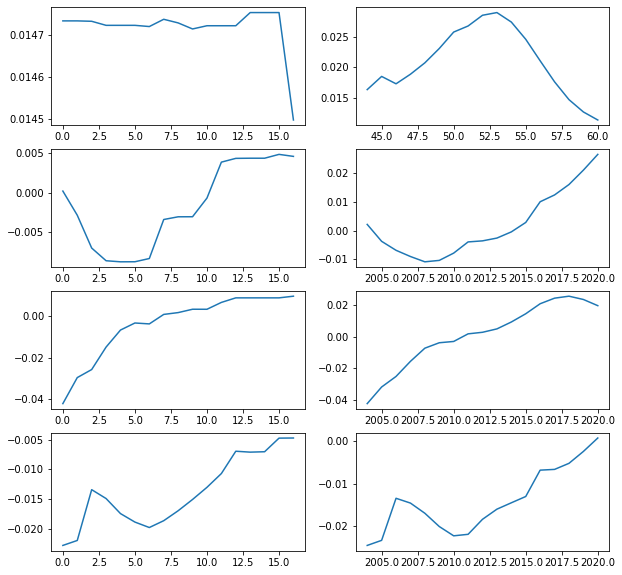

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
def Gradient(x):
    X_train, X_test, y_train, y_test = Test_Train(x)
    reg =GradientBoostingRegressor(random_state = 42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    reg.fit(X_train_scale, y_train)
    prediction = reg.predict(X_test_scale)
    return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(4,2, figsize=(10,10))
ax[0,0].plot(Gradient(Japan)[0])
ax[0,1].plot(Gradient(Japan)[1])
ax[1,0].plot(Gradient(Korea)[0])
ax[1,1].plot(Gradient(Korea)[1])
ax[2,0].plot(Gradient(China)[0])
ax[2,1].plot(Gradient(China)[1])
ax[3,0].plot(Gradient(Malaysia)[0])
ax[3,1].plot(Gradient(Malaysia)[1])
print('Japan:',Gradient(Japan)[2])
print('Korea:',Gradient(Korea)[2])
print('China:',Gradient(China)[2])
print('Malaysia:',Gradient(Malaysia)[2])

In [17]:
from sklearn.ensemble import RandomForestRegressor
empty = []
def RandomForest(i,x):
    (X_train, X_test, y_train, y_test) = Test_Train(x)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    regr = RandomForestRegressor(max_depth =i, random_state =42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return( r2_score(prediction, y_test))
for i in range(1,20):
    empty.append(RandomForest(i,China))
empty 

[-1.853249973219802,
 -0.1061068825713436,
 0.4031031976919741,
 0.38784430007659365,
 0.325334956031739,
 0.3661323307910783,
 0.3601103087262493,
 0.3734362997581533,
 0.3700395290904699,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913,
 0.37012682611806913]

Japan: -2731.4746507212053
China: 0.4031031976919741
Malaysia: -0.2121636855011697


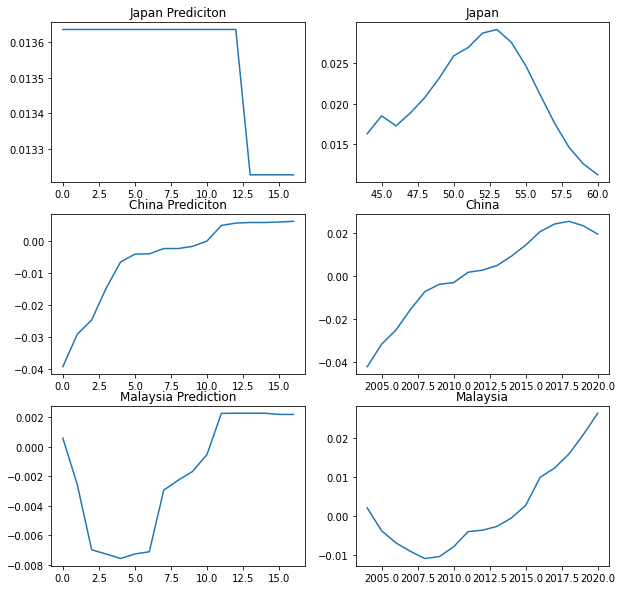

In [9]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(x):
    (X_train, X_test, y_train, y_test) = Test_Train(x)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    regr = RandomForestRegressor(max_depth = 3, random_state=42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(RandomForest(Japan)[0])
ax[0,0].set_title('Japan Prediciton')
ax[0,1].plot(RandomForest(Japan)[1])
ax[0,1].set_title('Japan')
ax[1,0].plot(RandomForest(China)[0])
ax[1,0].set_title('China Prediciton')
ax[1,1].plot(RandomForest(China)[1])
ax[1,1].set_title('China')
ax[2,0].plot(RandomForest(Korea)[0])
ax[2,0].set_title('Malaysia Prediction')
ax[2,1].plot(RandomForest(Korea)[1])
ax[2,1].set_title('Malaysia')
print('Japan:',RandomForest(Japan)[2])
print('China:',RandomForest(China)[2])
print('Malaysia:',RandomForest(Malaysia)[2])


summary:                               ARMA Model Results                              
Dep. Variable:     Work Population(%)   No. Observations:                   42
Model:                     ARMA(1, 0)   Log Likelihood                 141.327
Method:                       css-mle   S.D. of innovations              0.008
Date:                Tue, 12 Jul 2022   AIC                           -276.654
Time:                        19:40:31   BIC                           -271.441
Sample:                             0   HQIC                          -274.743
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0147      0.011     -1.334      0.182      -0.036       0.007
ar.L1.Work Population(%)     0.9051      0.074     12.278      0.000       0.761

C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

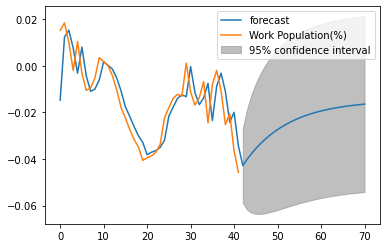

In [10]:
X_train, X_test, y_train, y_test = Test_Train(China)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(y_train, order=(1,0))
res = mod.fit()

print("summary:",res.summary())
res.plot_predict(start=0, end=70)
plt.show()

[ 0. -0.  0.  0. -0.]


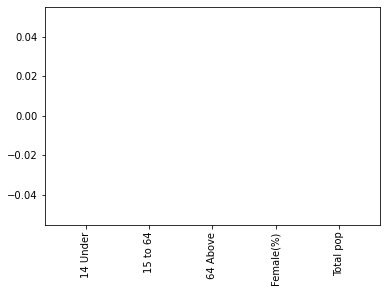

In [11]:
X_train, X_test, y_train, y_test = Test_Train(Japan)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(X_train, y_train)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

[ 0. -0. -0.  0.  0.]


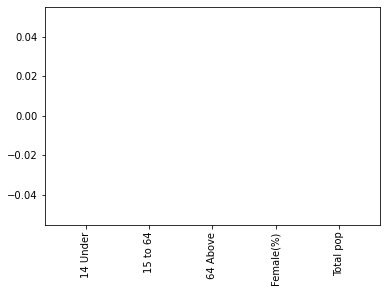

In [12]:
X_train, X_test, y_train, y_test = Test_Train(China)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.3)
lasso.fit(X_train, y_train)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()